In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import MulensModel as mm
%matplotlib inline

In [2]:
with h5py.File('/work/hmzhao/irregular-lc/roman-0-8dof-small.h5') as inp:
    X_random = inp['X_random'][...]
    X_even = inp['X_even'][...]
    Y = inp['Y'][...]

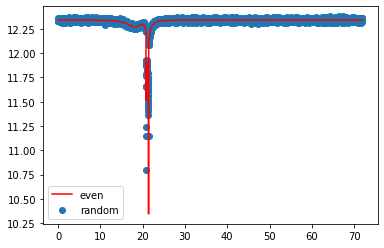

[1.87318841e+01 2.80371042e+00 6.47528947e-01 2.87889247e-04
 1.40989349e-01 1.73211575e+00 3.25066514e+02 1.36905544e-01]
34.31343310735827 -0.8508136954343257


In [16]:
num = 5
plt.plot(X_even[num][:, 0], X_even[num][:, 1], color='red')
plt.scatter(X_random[num][:, 0], X_random[num][:, 1])
plt.legend(['even', 'random'])
plt.show()
print(Y[num])
# plt.plot(X[num][:, 0], X[num][:, 1])
# plt.errorbar(X[num][:, 0], X[num][:, 1], yerr = X[num][:, 2])

single = mm.Model({'t_0': Y[num, 0], 'u_0': Y[num, 2], 't_E': Y[num, 1]})
data = mm.MulensData([X_random[num, :, 0], X_random[num, :, 1], X_random[num, :, 2]], phot_fmt='flux')
event_single = mm.Event([data], single)
chi2 = event_single.get_chi2()
print(chi2/7200, np.log10(Y[num, 4]))

In [5]:
from tqdm.notebook import tqdm
chi2s = []
for num in tqdm(range(len(Y))):
    single = mm.Model({'t_0': Y[num, 0], 'u_0': Y[num, 2], 't_E': Y[num, 1]})
    data = mm.MulensData([X_random[num, :, 0], X_random[num, :, 1], X_random[num, :, 2]], phot_fmt='flux')
    event_single = mm.Event([data], single)
    chi2 = event_single.get_chi2()
    chi2s.append(chi2)

  0%|          | 0/1000 [00:00<?, ?it/s]

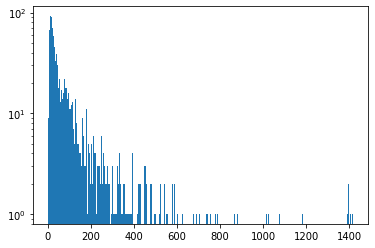

In [6]:
hist = plt.hist(np.array(chi2s)/7200, bins=300, log=True)
plt.show()

In [7]:
(np.array(chi2s)/7200).max()

1416.034499514153

In [10]:
hist[0][:10]

array([ 9., 67., 92., 91., 71., 58., 46., 33., 39., 30.])

In [9]:
hist[1][:5]

array([ 2.59236298,  7.30383676, 12.01531055, 16.72678434, 21.43825813])